https://ride.citibikenyc.com/system-data  
https://www.weather.gov/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the City Bike Trip data

In [2]:
df1 = pd.read_csv('../../DATA/202109-citibike-tripdata.csv', low_memory=False)

In [3]:
df1.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,22C33F42C6A0E28E,classic_bike,2021-09-01 10:26:45,2021-09-01 10:43:23,Central Park West & W 72 St,7141.07,E 51 St & 1 Ave,6532.06,40.775794,-73.976206,40.754557,-73.965930,member
1,035F743147FCFCDE,classic_bike,2021-09-04 09:52:40,2021-09-04 10:09:19,William St & Pine St,5065.12,NaN,NaN,40.707179,-74.008873,40.720000,-74.010000,member
2,9C43CF6A07DACBC6,classic_bike,2021-09-06 17:07:40,2021-09-06 17:34:44,Fulton St & Broadway,5175.08,Jay St & Tech Pl,4710.06,40.711066,-74.009447,40.695065,-73.987167,casual
3,253A1A5B20CC78EE,classic_bike,2021-09-28 16:53:43,2021-09-28 17:03:00,West Drive & Prospect Park West,3651.04,Ocean Pkwy & Church Ave,3125.09,40.661063,-73.979453,40.644719,-73.974515,member
4,5E8F164D6798CEFA,classic_bike,2021-09-19 09:37:47,2021-09-19 09:53:42,Lorimer St & Broadway,4965.01,Jay St & Tech Pl,4710.06,40.704118,-73.948186,40.695065,-73.987167,member


In [4]:
df1.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
3280216,8A1C8DB4249BF100,classic_bike,2021-09-26 16:00:45,2021-09-26 16:20:51,8 Ave & W 31 St,6450.05,W 67 St & Broadway,7116.04,40.750585,-73.994685,40.774925,-73.982666,casual
3280217,C290EE73DF58AD79,classic_bike,2021-09-07 08:22:06,2021-09-07 08:38:40,S Portland Ave & Hanson Pl,4354.05,S 3 St & Bedford Ave,5235.05,40.685396,-73.974315,40.712605,-73.962644,casual
3280218,E42F8B93C4168658,classic_bike,2021-09-30 20:50:23,2021-09-30 20:59:13,West End Ave & W 60 St,7059.08,Amsterdam Ave & W 66 St,7149.05,40.772370,-73.990050,40.774667,-73.984706,casual
3280219,7221F0C58026A827,classic_bike,2021-09-08 19:06:24,2021-09-08 19:10:57,West End Ave & W 60 St,7059.08,Amsterdam Ave & W 66 St,7149.05,40.772370,-73.990050,40.774667,-73.984706,member
3280220,689F3FAE372C013C,classic_bike,2021-09-27 07:58:57,2021-09-27 08:02:31,West End Ave & W 60 St,7059.08,W 67 St & Broadway,7116.04,40.772370,-73.990050,40.774925,-73.982666,member


In [5]:
df1['started_at'] = pd.to_datetime(df1['started_at'])

In [6]:
df1['ended_at'] = pd.to_datetime(df1['ended_at'])

In [7]:
df1['started_at']

0         2021-09-01 10:26:45
1         2021-09-04 09:52:40
2         2021-09-06 17:07:40
3         2021-09-28 16:53:43
4         2021-09-19 09:37:47
                  ...        
3280216   2021-09-26 16:00:45
3280217   2021-09-07 08:22:06
3280218   2021-09-30 20:50:23
3280219   2021-09-08 19:06:24
3280220   2021-09-27 07:58:57
Name: started_at, Length: 3280221, dtype: datetime64[ns]

In [8]:
df1['started_at'].dt.month.unique()

array([9])

In [9]:
df1['started_at'].dt.day.min(), df1['started_at'].dt.day.max()

(1, 30)

In [10]:
df1['Date'] = pd.to_datetime(df1['started_at'].dt.date)

In [11]:
df1['Date']

0         2021-09-01
1         2021-09-04
2         2021-09-06
3         2021-09-28
4         2021-09-19
             ...    
3280216   2021-09-26
3280217   2021-09-07
3280218   2021-09-30
3280219   2021-09-08
3280220   2021-09-27
Name: Date, Length: 3280221, dtype: datetime64[ns]

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3280221 entries, 0 to 3280220
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    float64       
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  Date                datetime64[ns]
dtypes: datetime64[ns](3), float64(5), object(6)
memory usage: 350.4+ MB


In [13]:
df1.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name       18
start_station_id         18
end_station_name      15351
end_station_id        15351
start_lat                 0
start_lng                 0
end_lat                8784
end_lng                8784
member_casual             0
Date                      0
dtype: int64

### Loading the Weather data

In [14]:
df2 = pd.read_csv('../../DATA/weather_data.csv', skiprows=4)

In [15]:
df2.columns = ['Date', 'Max_temperature', 'Min_temperature', 'Average_temp', 'Departure_temp',
              'HDD', 'CDD', 'Precipitation', 'New Snow', 'Snow Depth']

In [16]:
df2 = df2.iloc[:30]

In [17]:
df2

,Date,Max_temperature,Min_temperature,Average_temp,Departure_temp,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2021-09-01,78,63.0,70.5,-3.3,0,6,7.13,0,0
1,2021-09-02,77,61.0,69,-4.5,0,4,0.1,0,0
2,2021-09-03,74,59.0,66.5,-6.8,0,2,0,0,0
3,2021-09-04,79,61.0,70,-3.0,0,5,0,0,0
4,2021-09-05,74,67.0,70.5,-2.3,0,6,0.02,0,0
5,2021-09-06,81,69.0,75,2.5,0,10,T,0,0
6,2021-09-07,79,65.0,72,-0.2,0,7,0,0,0
7,2021-09-08,82,70.0,76,4.1,0,11,0,0,0
8,2021-09-09,76,68.0,72,0.4,0,7,0.26,0,0
9,2021-09-10,74,63.0,68.5,-2.8,0,4,0,0,0


#### Modify the features

In [18]:
df2['Date'] = pd.to_datetime(df2['Date'])

Convert all temperature variables from Farrenheit to Celsius using the following formulae:
\begin{equation}
T_c = \frac{(T_f-32)5}{9}
\end{equation}
\begin{equation}
\Delta T_c = \frac{\Delta T_f5}{9}
\end{equation}

In [19]:
df2['Max_temperature'] = df2['Max_temperature'].apply(lambda x: np.round((float(x)-32)*5/9, 1))

In [20]:
df2['Min_temperature'] = df2['Min_temperature'].apply(lambda x: np.round((float(x)-32)*5/9, 1))

In [21]:
df2['Average_temp'] = df2['Average_temp'].apply(lambda x: np.round((float(x)-32)*5/9, 1))

In [22]:
df2['Departure_temp'] = df2['Departure_temp'].apply(lambda x: np.round(float(x)*5/9, 1))

In [23]:
df2['HDD'] = df2['HDD'].apply(lambda x: np.round(float(x)*5/9, 1))

In [24]:
df2['CDD'] = df2['CDD'].apply(lambda x: np.round(float(x)*5/9, 1))

In the Precipitation variable, the letter 'T' stands from 'Trace' - it means that the precipitation is so small that it is immeasurable so we can safely set it to 0.

In [25]:
df2['Precipitation'] = df2['Precipitation'].replace('T', 0).apply(float)

In [26]:
df2

,Date,Max_temperature,Min_temperature,Average_temp,Departure_temp,HDD,CDD,Precipitation,New Snow,Snow Depth
0,2021-09-01,25.6,17.2,21.4,-1.8,0.0,3.3,7.13,0,0
1,2021-09-02,25.0,16.1,20.6,-2.5,0.0,2.2,0.10,0,0
2,2021-09-03,23.3,15.0,19.2,-3.8,0.0,1.1,0.00,0,0
3,2021-09-04,26.1,16.1,21.1,-1.7,0.0,2.8,0.00,0,0
4,2021-09-05,23.3,19.4,21.4,-1.3,0.0,3.3,0.02,0,0
5,2021-09-06,27.2,20.6,23.9,1.4,0.0,5.6,0.00,0,0
6,2021-09-07,26.1,18.3,22.2,-0.1,0.0,3.9,0.00,0,0
7,2021-09-08,27.8,21.1,24.4,2.3,0.0,6.1,0.00,0,0
8,2021-09-09,24.4,20.0,22.2,0.2,0.0,3.9,0.26,0,0
9,2021-09-10,23.3,17.2,20.3,-1.6,0.0,2.2,0.00,0,0


There is no snow in September, so we drop those features.

In [27]:
df2 = df2.drop(['New Snow', 'Snow Depth'], axis=1)

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             30 non-null     datetime64[ns]
 1   Max_temperature  30 non-null     float64       
 2   Min_temperature  30 non-null     float64       
 3   Average_temp     30 non-null     float64       
 4   Departure_temp   30 non-null     float64       
 5   HDD              30 non-null     float64       
 6   CDD              30 non-null     float64       
 7   Precipitation    30 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.0 KB


### Merging the two datasets

In [33]:
df1['Date'].nunique(), df2['Date'].nunique()

(30, 30)

In [29]:
np.sort(df1['Date'].unique()) == df2['Date'].unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [30]:
df = df1.merge(df2, on='Date')

In [31]:
df.head().transpose()

,0,1,2,3,4
ride_id,22C33F42C6A0E28E,EEF389AE0C7B62D7,8156B912E79C423A,BE198753368E271C,F5EB435CEBD2AF48
rideable_type,classic_bike,classic_bike,classic_bike,classic_bike,classic_bike
started_at,2021-09-01 10:26:45,2021-09-01 15:53:39,2021-09-01 17:00:22,2021-09-01 10:42:37,2021-09-01 23:18:14
ended_at,2021-09-01 10:43:23,2021-09-01 16:17:13,2021-09-01 17:40:07,2021-09-01 11:09:22,2021-09-02 08:23:49
start_station_name,Central Park West & W 72 St,2 Ave & E 31 St,Central Park W & W 97 St,8 Ave & W 38 St,8 Ave & W 38 St
start_station_id,7141.07,6197.02,7538.18,6526.05,6526.05
end_station_name,E 51 St & 1 Ave,S 4 St & Wythe Ave,Calyer St & Jewel St,Central Park S & 6 Ave,NaN
end_station_id,6532.06,5204.05,5743.02,6876.04,NaN
start_lat,40.775794,40.742909,40.792495,40.75461,40.75461
start_lng,-73.976206,-73.977061,-73.964171,-73.99177,-73.99177


Next steps:
- convert temperature from Farrenheit to Celsius
- clarify the meaning of all features
- clean the data (remove null values)
- engineer new features
- Group By date
- investigate time evolution and dependance between features
- eventually build a forecasting model
- eventually plot start and end points of journeys on a map using plotly

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3280221 entries, 0 to 3280220
Data columns (total 21 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    float64       
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  Date                datetime64[ns]
 14  Max_temperature     float64       
 15  Min_temperature     float64       
 16  Average_temp        float64       
 17  Departure_temp      float64       
 18  HDD                 float64       
 19  CDD                 float64       
 20  Pr

### Engineering new features

Time of each journey in minutes

In [46]:
df['ended_at'] - df['started_at']

0         0 days 00:16:38
1         0 days 00:23:34
2         0 days 00:39:45
3         0 days 00:26:45
4         0 days 09:05:35
                ...      
3280216   0 days 00:12:00
3280217   0 days 00:09:42
3280218   0 days 00:36:37
3280219   0 days 00:12:53
3280220   0 days 00:07:39
Length: 3280221, dtype: timedelta64[ns]

In [47]:
df['minutes_of_journey'] = (df['ended_at'] - df['started_at']).dt.seconds//60

In [48]:
df['minutes_of_journey']

0           16
1           23
2           39
3           26
4          545
          ... 
3280216     12
3280217      9
3280218     36
3280219     12
3280220      7
Name: minutes_of_journey, Length: 3280221, dtype: int64

Does rider return to the same station that he started at (boolean)?

In [53]:
df['return_to_same_station'] = (df['start_station_name'] == df['end_station_name']).apply(int)

In [ ]:
df['return_to_same_station'].sum()/len(df)

About 5% of the journeys return to the same station.

In [57]:
df['member_casual'].unique()

array(['member', 'casual'], dtype=object)

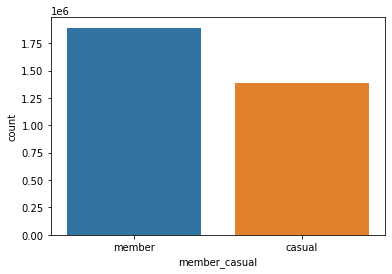

In [59]:
sns.countplot(data=df, x='member_casual');

In [72]:
df['day_of_week'] = df['Date'].dt.day_name()

In [73]:
df['day_of_week'].unique()

array(['Wednesday', 'Saturday', 'Monday', 'Tuesday', 'Sunday', 'Thursday',
       'Friday'], dtype=object)

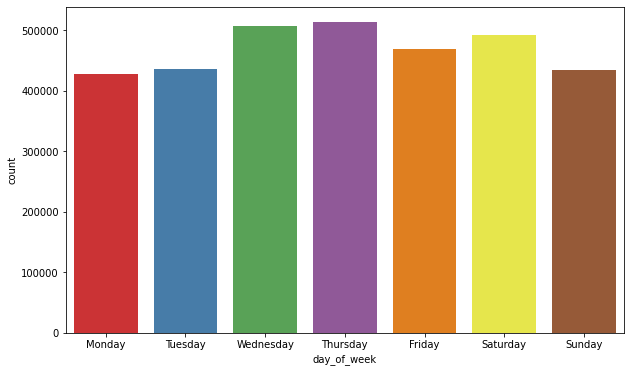

In [77]:
plt.figure(figsize=(10,6))

sns.countplot(data=df, x='day_of_week', palette='Set1',
             order=['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                   'Friday', 'Saturday', 'Sunday']);

In [79]:
df['start_station_id'].nunique(), df['end_station_id'].nunique(), len(df)

(1488, 1524, 3280221)

### Group By Date

In [80]:
#d_agg = {}

In [81]:
#df.groupby('Date').agg(d_agg)